In [14]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import norm

import torch
from torch import nn
from torch import optim
# from torch.utils.data import DataLoader
# from torchvision import datasets, transforms

print(torch.__version__)

1.10.1


In [9]:
def f(t,x):
    dydt = x**2
    # dydt = -np.exp(-x)
    return dydt

def y(t):
    y = 1/3 * t**3 + 0
    # y = np.exp(-x)
    return y

In [11]:
# y'(t) = f(t),   where f(t) = y' = t**2
t0, tN, h = -1, 1, 0.02
t = np.arange(t0, tN+h, h)
y0 = y(t0)

# solution: y(t) = 1/3 * t**3 + C
y_true = y(t) # y = 1/3 * t**3 + 0

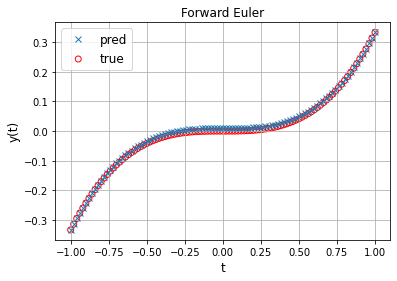

The L2-norm is: 0.0736397636546367


In [15]:
# Forward Euler
y_pred_FE = np.zeros(len(t))
y_pred_FE[0] = y0
for n in range(len(y_pred_FE)-1):
    y_pred_FE[n+1] = y_pred_FE[n] + h*f(None, t[n])
error = norm([y_true - y_pred_FE],2)

plt.figure()
plt.scatter(t,y_true,facecolors='none', edgecolors='r',label='true')
plt.plot(t,y_pred_FE, marker='x',linestyle='',label='pred')
plt.grid()
plt.xlabel('t', fontsize='large')
plt.ylabel('y(t)', fontsize='large')
plt.legend(loc='best',fontsize='large')
plt.title('Forward Euler')
plt.show()
print('The L2-norm is: {0}'.format(error))

In [21]:
class LinearNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearNet, self).__init__()

        self.layer1 = nn.Linear(input_dim, output_dim, bias=False)
        
        #no activation function

    def forward(self, x):
        x = self.layer1(x)
        #no activation
        return x

net = LinearNet(2, 1) #in case of forward euler
print(net)

LinearNet(
  (layer1): Linear(in_features=2, out_features=1, bias=False)
)


In [32]:
# training loop
# 1) sample simple ODE (create data set)
# 2) forward pass: x_t = phi(phi(phi(...)))
# 3) do not zero out gradient in training for loop!
# 4) update parameters theta_2 = theta_1 - eta*L(theta_1)

criterion = nn.MSELoss() #size_average=False
optimizer = optim.SGD(net.parameters(),lr=10e-4)
# set model to Train mode
# net.train()

# epochs = 2
y_pred = y0
# loss_track = 0

# t = t0 #if I use f(x)
idx = 0



# y_pred[i+1] = 1*y_pred[i] + h*1*y_prime[i]
# y_pred[1] = y_pred[0] + h*f(None, )



# for iteration in range(int(len(y_true)-1)):
for iteration in range(10):
    # net.zero_grad()
    inputs = torch.Tensor([y_pred, f(None, y_pred)]) #take as input of f y_prime or y_true (teacher enforcing)
    # compute the prediction
    out = net(inputs)
    print('out: '+str(out))
    # Compute Loss
    loss = criterion(out, y_true[idx+1])
    print('ytrue: '+str(y_true[idx+1]))
    # Backward pass
    loss.backward()
    # adjust the weights
    optimizer.step()
    #track the loss
    # loss_track += loss.item()
    # t = t+h
    # idx = idx+1
    print('loss = ' + str(loss))
    print(iteration)
    # print("Training loss after {0} epochs: {1}".format(e+1,loss_track/len(trainloader)))


out: tensor([-0.2185], grad_fn=<SqueezeBackward3>)
ytrue: tensor(-0.3137)
loss = tensor(0.0091, grad_fn=<MseLossBackward0>)
0
out: tensor([-0.2185], grad_fn=<SqueezeBackward3>)
ytrue: tensor(-0.3137)
loss = tensor(0.0091, grad_fn=<MseLossBackward0>)
1
out: tensor([-0.2186], grad_fn=<SqueezeBackward3>)
ytrue: tensor(-0.3137)
loss = tensor(0.0091, grad_fn=<MseLossBackward0>)
2
out: tensor([-0.2186], grad_fn=<SqueezeBackward3>)
ytrue: tensor(-0.3137)
loss = tensor(0.0090, grad_fn=<MseLossBackward0>)
3
out: tensor([-0.2187], grad_fn=<SqueezeBackward3>)
ytrue: tensor(-0.3137)
loss = tensor(0.0090, grad_fn=<MseLossBackward0>)
4
out: tensor([-0.2188], grad_fn=<SqueezeBackward3>)
ytrue: tensor(-0.3137)
loss = tensor(0.0090, grad_fn=<MseLossBackward0>)
5
out: tensor([-0.2190], grad_fn=<SqueezeBackward3>)
ytrue: tensor(-0.3137)
loss = tensor(0.0090, grad_fn=<MseLossBackward0>)
6
out: tensor([-0.2192], grad_fn=<SqueezeBackward3>)
ytrue: tensor(-0.3137)
loss = tensor(0.0089, grad_fn=<MseLossBackwa

In [30]:
print(net.layer1.parameters.grad)

tensor([[0., 0.]])


In [218]:
y_true

tensor([-3.3333e-01, -3.1373e-01, -2.9491e-01, -2.7686e-01, -2.5956e-01,
        -2.4300e-01, -2.2716e-01, -2.1202e-01, -1.9757e-01, -1.8379e-01,
        -1.7067e-01, -1.5818e-01, -1.4633e-01, -1.3507e-01, -1.2442e-01,
        -1.1433e-01, -1.0481e-01, -9.5832e-02, -8.7381e-02, -7.9443e-02,
        -7.2000e-02, -6.5037e-02, -5.8539e-02, -5.2488e-02, -4.6869e-02,
        -4.1667e-02, -3.6864e-02, -3.2445e-02, -2.8395e-02, -2.4696e-02,
        -2.1333e-02, -1.8291e-02, -1.5552e-02, -1.3101e-02, -1.0923e-02,
        -9.0000e-03, -7.3173e-03, -5.8587e-03, -4.6080e-03, -3.5493e-03,
        -2.6667e-03, -1.9440e-03, -1.3653e-03, -9.1467e-04, -5.7600e-04,
        -3.3333e-04, -1.7067e-04, -7.2000e-05, -2.1333e-05, -2.6667e-06,
         0.0000e+00,  2.6667e-06,  2.1333e-05,  7.2000e-05,  1.7067e-04,
         3.3333e-04,  5.7600e-04,  9.1467e-04,  1.3653e-03,  1.9440e-03,
         2.6667e-03,  3.5493e-03,  4.6080e-03,  5.8587e-03,  7.3173e-03,
         9.0000e-03,  1.0923e-02,  1.3101e-02,  1.5